[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer/sisl/GeometryPlot?style=for-the-badge)](https://github.com/pfebrer/sisl/labels/GeometryPlot)

    
    
GeometryPlot
=========

In [1]:
import sisl
import sisl.viz
import numpy as np

First of all, we will create a geometry to work with

In [2]:
geom = sisl.geom.graphene_nanoribbon(9)

`GeometryPlot` allows you to quickly visualize a geometry. You can create a `GeometryPlot` out of a geometry very easily:

In [3]:
# GeometryPlot is the default plot of a geometry, so one can just do
plot = geom.plot()

Now let's see what we got:

In [4]:
plot

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

## Plotting in 3D, 2D and 1D

The 3D view is great, but for big geometries it can take some time to render. If we have a 2d material, a 2D view might be more practical instead. We can get it by specifying the axes that we want:

In [5]:
plot.update_settings(axes="xy")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

The next section goes more in depth on what the `axes` setting accepts. The important part for now is that asking for two axes gets you a 2D representation. Samewise, asking for 1 axis gets you a 1D representation:

In [6]:
plot.update_settings(axes="x")

FigureWidget({
    'data': [{'marker': {'color': [grey, grey, grey, grey, grey, grey, grey, grey,
            …

Notice how asking for a 1D representation leaves the Y axis of the plot at your disposal. You can control the values in the second axis using the `dataaxis_1d` setting.

It can be an array that **explicitly sets the values**:

In [7]:
plot.update_settings(axes="x", dataaxis_1d=plot.geometry.atoms.Z)

FigureWidget({
    'data': [{'marker': {'color': [grey, grey, grey, grey, grey, grey, grey, grey,
            …

Or a function that **accepts the projected coordinates and returns the values**.

In [8]:
plot.update_settings(dataaxis_1d=np.sin)

FigureWidget({
    'data': [{'marker': {'color': [grey, grey, grey, grey, grey, grey, grey, grey,
            …

Asking for three axes would bring us back to the 3D representation:

In [9]:
plot.update_settings(axes="xyz")

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Specifying the axes
----------

There are many ways in which you may want to display the coordinates of your geometry. The most common one is to display the cartesian coordinates. You indicate that you want cartesian coordinates by passing `{"x", "y", "z"}`. You can pass them as a list: 

In [10]:
plot.update_settings(axes=["x", "y"])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

But it is usually more convenient to pass them as a multicharacter string:

In [11]:
plot.update_settings(axes="xy")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Notice that you can order axes in any way you want. The first one will go to the X axis of the plot, and the second to the Y axis:

In [12]:
plot.update_settings(axes="yx")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

You are not limited to cartesian coordinates though. Passing `{"a", "b", "c"}` will display the fractional coordinates:

In [13]:
plot.update_settings(axes="ab")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

And you can also pass an **arbitrary direction** as an axis: 

In [14]:
plot.update_settings(axes=[[1,1,0], [1, -1, 0]])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In this case, we have projected the coordinates into the `[1,1,0]` and `[1, -1, 0]` directions. Notice that the modulus of the vector is important for the scaling. See for example what happens when we scale the second vector by a factor of two:

In [15]:
plot.update_settings(axes=[[1,1,0], [2, -2, 0]])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Finally, you can even mix the different possibilities!

In [16]:
plot.update_settings(axes=["x", [1,1,0]])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

To summarize the different possibilities:

- `{"x", "y", "z"}`: The **cartesian coordinates** are displayed.
- `{"a", "b", "c"}`: The **fractional coordinates** are displayed. Same for {0,1,2}.
- `np.array of shape (3, )`: The coordinates are **projected into that direction**. If two directions are passed, the coordinates are not projected to each axis separately. The displayed coordinates are then the coefficients of the linear combination to get that point (or the projection of that point into the plane formed by the two axes).

<div class="alert alert-warning">
    
Some non-obvious behavior
    
**Fractional coordinates are only displayed if all axes are lattice vectors**. Otherwise, the plot works as if you had passed the direction of the lattice vector. Also, for now, the **3D representation only displays cartesian coordinates**.

</div>

## Toggling bonds, atoms and cell

You might have noticed that, by default, the cell, atoms and bonds are displayed. Thanks to plotly's capabilities, **you can interactively toggle them by clicking at the names in the legend**, which is great!

However, if you want to make sure they are not displayed in the first place, you can set the `show_bonds`, `show_cell` and `show_atoms` settings to `False`.

In [17]:
plot.update_settings(axes="xy", show_cell=False, show_atoms=False)

IndexError: arrays used as indices must be of integer (or boolean) type

## Picking which atoms to display

The `atoms` setting of `GeometryPlot` allows you to pick which atoms to display. It accepts exactly the same possibilities as the `atoms` argument in `Geometry`'s methods.

Therefore, you can ask for certain indices:

In [18]:
plot.update_settings(atoms=[1,2,3,4,5], show_atoms=True, show_cell="axes")
#show_cell accepts "box", "axes" and False

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

or use sisl categories to filter the atoms, for example. 

We can use it to display only those atoms that have 3 neighbours:

In [19]:
plot.update_settings(atoms={"neighbours": 3}, show_cell="box")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Notice that when we picked particular atoms, only the bonds of those atoms are displayed. You can change this by using the `bind_bonds_to_ats` setting.

In [20]:
plot.update_settings(bind_bonds_to_ats=False)

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In fact, when we set `show_atoms` to `False`, all that the plot does is to act as if `atoms=[]` and `bind_bonds_to_ats=False`.

## Setting custom colors and size for atoms.

It is quite common that you have an **atom-resolved property that you want to display**. With `GeometryPlot` this is extremely easy :)

We can provide arrays for the `atoms_color` and `atoms_size` settings.

In the case of `atoms_color` we can **provide the colors directly**:

In [21]:
# Let's color the atoms with orange and blue depending on their y position
colors = []
for x, y, z in plot.geometry.xyz:
    
    if y > 13:
        color = "orange"
    else:
        color = "blue"
    
    colors.append(color)


plot.update_settings(atoms_color=colors, atoms=None) # we set atoms to None to display all the atoms again 

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

or **provide an array of values that is mapped to colors** using a color scale that you can, of course, change (`atoms_colorscale` setting).

In [22]:
# Let's also color them using their y coordinate
y = plot.geometry.xyz[:,1]
plot.update_settings(atoms_color=y, atoms_colorscale="viridis")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Since "orange" size doesn't make sense, the `atoms_size` array only accepts values.

In [23]:
# We will determine their size using the x coordinate
x = plot.geometry.xyz[:, 0] 

plot.update_settings(atoms_size=x*10) # we multiply it by 10 because otherwise the size is too small

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Note that everything that we've done up to this moment is perfectly valid for the 3d view, we are just using the 2d view for convenience.

In [24]:
plot.update_settings(axes="xyz")

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Guess why do we have a giant multicolor ball? :)

That's right! Atom sizes are too big!

In [25]:
plot.update_settings(atoms_size=x/4)

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Much better!

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

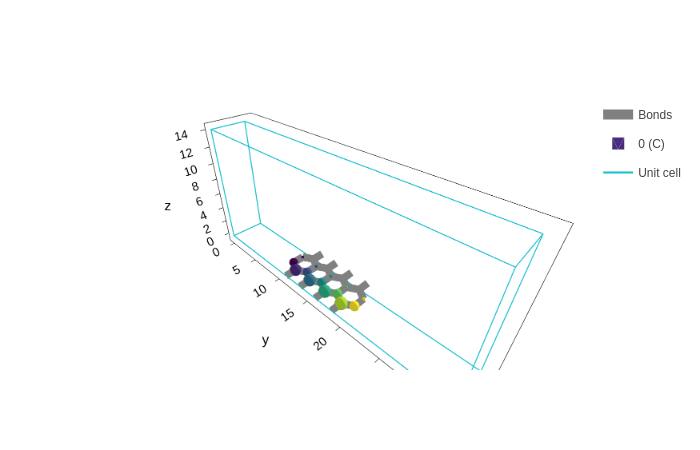

In [26]:
thumbnail_plot = plot

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------